# Relatório de HandsOn-1 e HandsOn-2

D. M. Costa$^1$, J. F. Caldas$^1$

$^1$ Department of Computer Engenier – University SENAI CIMATEC, Salvador, Bahia, Brazil 

# Resumo

Relatório de confecção dos dois primeiros HandsOn da disciplina de Programação Paralela ministrada pelo professor Murilo Boratto. Neste trabalho a problemática consiste em otimizar o processo de multiplicação de matrizes, cálculo de integral, filtros de imagens, números primos e testar o uso de diferentes diretivas da biblioteca OpenMP para linguagem C com a finalidade de proporcionar um primeiro contato com as tecnologias e metodologias que serão utilizadas na disciplina.

# Introdução

A ideia de programação paralela vêm desde o final dos anos 60 com Dijkstra e foi evoluindo através de processos sequenciais, Monitores e Sistemas Operacionais, programas concorrentes, exclusão mútua, variáveis compartilhadas, dentre outros [1].

Um dos conceitos citados que foi muito importante para evolução do paralelismo é o de programação concorrente que é “Um conjunto de programas sequenciais ordinários os quais são executados em uma abstração de paralelismo.” e acompanha também o conceito de pseudo-paralelismo uma vez que  Sobreposição de I/O e Computação, Multiprogramação e Multi-tarefação são exemplos de atividades concorrentes [1].

Tais concepções amadureceram e no panorama atual, o advento da programação paralela é dado por  “um algoritmo que é visto como um conjunto de partes que podem ser resolvidas concorrentemente, e cada parte é igualmente constituída por uma série de instruções sequenciais, mas que no seu conjunto podem ser executadas simultaneamente em vários processadores.” [2]
 Sendo assim cada vez mais é possível atingir novos níveis de potência e velocidade de processamento , melhores funcionalidades, mais confiabilidade, melhores tempos de execução, entre outros [1]. 

# Resultados e Discussão

### HandsOn 1 - Multiplicação de Matrizes

#### Sessão 1

Nesta sessão foi construído um algoritmo de multiplicação de matrizes a partir da utilização de 3 laços de repetição.

In [1]:
%%writefile mm.c
#include <stdio.h>

#include <stdlib.h>

void initializeMatrix(int * matrix, int size) {
  for (int i = 0; i < size; i++)
    for (int j = 0; j < size; j++)
      matrix[i * size + j] = rand() % (10 - 1) * 1;
}
void printMatrix(int * matrix, int size) {
  for (int i = 0; i < size; i++) {
    for (int j = 0; j < size; j++)
      printf("%d\t", matrix[i * size + j]);
    printf("\n");
  }
  printf("\n");
}
int main(int argc, char ** argv) {
  int size = atoi(argv[1]);
  int i, j, k;
  int * A = (int * ) malloc(sizeof(int) * size * size);
  int * B = (int * ) malloc(sizeof(int) * size * size);
  int * C = (int * ) malloc(sizeof(int) * size * size);
  initializeMatrix(A, size);
  initializeMatrix(B, size);
  for (i = 0; i < size; i++)
    for (j = 0; j < size; j++)
      for (k = 0; k < size; k++)
        C[i * size + j] += A[i * size + k] * B[k * size + j];
  printMatrix(A, size);
  printMatrix(B, size);
  printMatrix(C, size);
  return 0;
}

Writing mm.c


Então o código foi compilado e executado com apenas 1 *thread*.

In [2]:
!gcc ./mm.c -o mm
!./mm 10

1	7	0	7	5	7	1	3	6	1	
5	4	5	7	5	4	6	0	7	1	
8	8	6	6	8	8	8	4	1	1	
5	0	0	3	5	3	1	7	4	7	
6	0	0	2	5	4	5	2	2	3	
2	1	1	8	8	0	5	5	4	4	
6	0	5	6	2	8	7	3	4	2	
0	0	0	0	2	6	2	5	6	5	
7	6	6	8	5	3	6	2	8	1	
6	6	8	0	1	1	7	0	3	2	

0	1	2	1	8	3	5	2	6	0	
7	2	7	2	8	1	6	5	1	5	
4	6	0	4	6	2	3	2	0	4	
3	7	5	3	6	5	4	2	5	2	
1	3	2	8	3	2	0	0	7	2	
4	3	6	2	5	1	2	6	4	2	
2	7	8	5	1	5	1	4	8	4	
6	7	5	8	6	0	8	4	0	7	
4	2	8	1	5	2	3	7	8	7	
8	1	3	7	5	2	3	6	6	0	

155	141	212	132	210	81	135	157	173	140	
138	176	214	146	225	124	130	157	230	145	
190	237	261	226	306	142	192	189	252	175	
142	121	149	174	186	70	133	136	174	103	
81	103	131	124	137	77	82	100	171	70	
131	172	176	193	177	106	120	119	205	124	
136	188	203	153	215	117	134	162	212	129	
124	90	144	119	123	42	87	136	132	101	
171	208	249	174	281	140	176	184	253	180	
121	129	148	112	184	88	114	125	145	115	



Para realizar a paralelização, foi utilizada a biblioteca OMP, que foi instalada com os seguintes comandos:

In [5]:
!apt-get install libomp-dev
!sudo apt install build-essential
!sudo apt-get install manpages-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libomp5
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 0s (2,225 kB/s)
Selecting previously unselected package libomp5:amd64.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../libomp5_5.0.1-1_amd64.deb ...
Unpacking libomp5:amd64 (5.0.1-1) ...


Após isso, o código foi alterado para operar com mais de uma *thread* e criamos uma métrica para analisar o tempo de execução em cada tentativa.

In [3]:
%%writefile mm.c
/*
File:           mm.c
Last changed:   20220303 11:35:00 
Purpose:        Matrix Multiply Sequential Algorithm in C
Author:         Murilo Boratto  <muriloboratto 'at' fieb.org.br>
Usage:
HowToCompile:   gcc mm.c -o mm -fopenmp
HowToExecute:   ./mm    <size> 
                ./mm      100           
*/

#include <stdio.h>
#include <stdlib.h>
#include <omp.h>

void initializeMatrix(int *matrix, int size)
{
  for (int i = 0; i < size; i++)
    for (int j = 0; j < size; j++)
      matrix[i * size + j] = rand() % (10 - 1) * 1;
}

void printMatrix(int *matrix, int size)
{
  for (int i = 0; i < size; i++)
  {
    for (int j = 0; j < size; j++)
      printf("%d\t", matrix[i * size + j]);
    printf("\n");
  }
  printf("\n");
}

int main(int argc, char **argv) {
	int size = atoi(argv[1]);
	int i, j, k;
	double t1, t2;

	int *A = (int *) malloc (sizeof(int)*size*size);
	int *B = (int *) malloc (sizeof(int)*size*size);
	int *C = (int *) malloc (sizeof(int)*size*size);
	
	initializeMatrix(A, size);
	initializeMatrix(B, size);
	t1 = omp_get_wtime();
	#pragma omp parallel for private(i,j,k)
	for(i=0;i<size;i++)
		for(j=0;j<size;j++)
			for(k=0;k<size;k++)
				C[i*size+j] += A[i*size+k] * B[k*size+j];
	t2 = omp_get_wtime();

	printf("%d \t %f\n", size, t2 - t1);

	return 0;
}


Overwriting mm.c


In [6]:
!gcc ./mm.c -o mm -fopenmp

Então foi criado um *script* para executar o código várias vezes com quantidades de threads diferentes, retornando o tempo de execução de cada uma.

In [ ]:
%%writefile script.sh
#!/bin/sh
for i in 100 200 300 400 500 600 700 800 900 1000
do
  printf "\033[1D$i :"
  OMP_NUM_THREADS=$1 ./mm "$i"
done

Writing script.sh


In [ ]:
!bash script.sh 4

100 :100 	 0.008455
200 :200 	 0.035881
300 :300 	 0.125345
400 :400 	 0.324526
500 :500 	 0.670699
600 :600 	 1.162295
700 :700 	 1.876059
800 :800 	 2.780097
900 :900 	 4.637246
1000 :1000 	 8.204912


A partir dos dados colhidos através da execução sequencial do script com diferentes quantidade de *threads* foi possível montar gráficos utilizando a biblioteca GNUPlot.

**What is the behavior of the execution time and the speedup varying the size of the problem? (Show the solution with tabular and graphical values).**

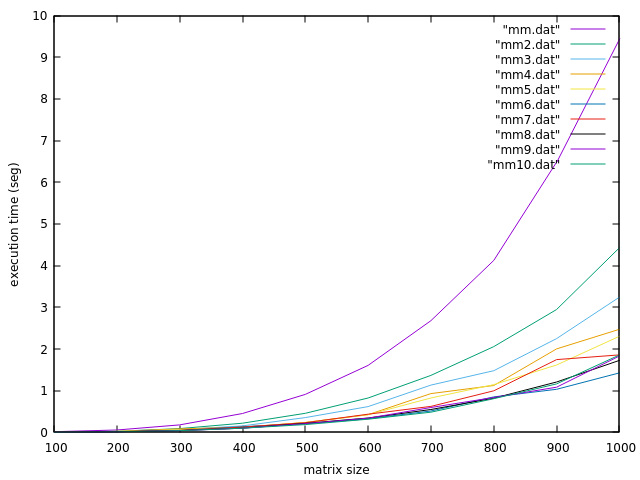

O gráfico acima mostra a relação entre o tamanho das matrizes e o tempo de execução para realizar a multiplicação, em que cada linha mostra a execução do algoritmo com diferentes quantidades de *threads*.

Nele é possível notar que há uma diferença significativa entre 1 e 5 threads, enquanto a partir de 6 as linhas são bem parecidas.

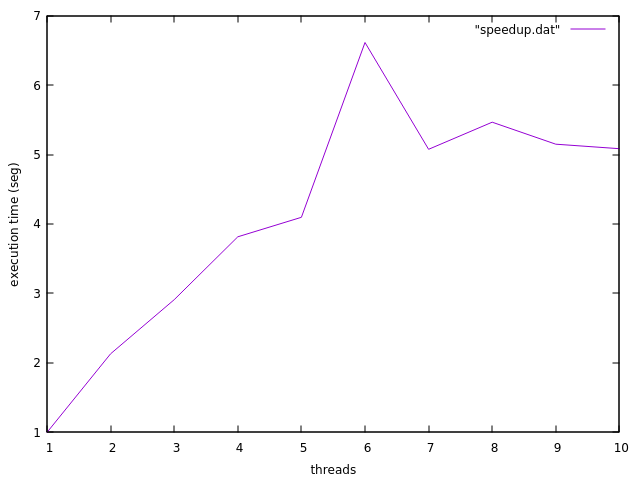

O *speedup* de um algoritomo baseado em computação paralela é uma métrica que calcula a eficiência do código comparando o tempo de execução ao utilizar diferentes quantidades de *threads*. 

Portanto, a figura acima representa o *speedup* do algoritmo de multiplicação de matrizes de 1 a 10 *threads* com uma matriz de tamanho 1000 x 1000.

Dessa forma, é possível notar que até 5 *threads* o *speedup* aumenta significativamente, já com 6 *threads* há uma anomalia no gráfico, pois o computador em que o algoritmo foi executado também estava processando outras tarefas do sistema operacional, e entre 6 e 10 *threads* o *speedup* quase não se alterou. 



**What is the optimal number of threads for the best parallel solution?**

Levando em consideração a arquitetura do computador em que o algoritmo foi executado, a quantidade de *threads* com maior *speedup* foi 6.

#### Sessão 2

Nesta sessão foi contruído um código que divide a matriz em blocos para realizar a multiplicação, em que cada *thread* atua em apenas uma parte da matriz.

In [ ]:
%%writefile asyncTaskOpenMP.c
/*
File:           asyncTaskOpenMP.c
Purpose:        Implement the asynchronous tasks using API OpenMP
Author:         Murilo Boratto  <muriloboratto 'at' fieb.org.br>
Usage:
HowToCompile:   gcc asyncTaskOpenMP.c -o asyncTaskOpenMP -fopenmp
HowToExecute:   ./asyncTaskOpenMP    <size>   <blockSize>
Example:        ./asyncTaskOpenMP      10           2
*/

#include <stdio.h>
#include <stdlib.h>
#include <omp.h>
#define SIZE_MATRIX 10

int main(int argc, char **argv)
{
  int n = atoi(argv[1]);
  int block_size = atoi(argv[2]);
  int matrix[SIZE_MATRIX][SIZE_MATRIX], k1 = 10, k2 = 20, k3 = 30, k4 = 40, k5 = 50;
  int i, j, row, column;

  for(i = 0; i < n; i++)
  {
    for(j = 0; j < n; j++)
    {
      matrix[i][j] = 5;
      printf("%d\t", matrix[i][j]);
    }
    printf("\n");
  }

  printf("\n\n");

  omp_set_num_threads(5);

  #pragma omp parallel private(row, column)
  {
    int id = omp_get_thread_num();

    if(id == 0)
    {
      for(row = 0; row < n; row++)
        for(column = 0; column < block_size; column++)
          matrix[row][column] *= k1;
    }

    if(id == 1)
    {
      for(row = 0; row < n; row++)
        for(column = block_size; column < 2 * block_size; column++)
          matrix[row][column] *= k2;
    }
    
    if(id == 2)
    {
      for(row = 0; row < n; row++)
        for(column = 2 * block_size; column < 3 * block_size; column++)
          matrix[row][column] *= k3;
    }
    
    if(id == 3)
    {
      for(row = 0; row < n; row++)
        for(column = 3 * block_size; column < 4 * block_size; column++)
          matrix[row][column] *= k4;
    }
    
    if(id == 4)
    {
      for(row = 0; row < n; row++)
        for(column = 4 * block_size; column < 5 * block_size; column++)
          matrix[row][column] *= k5;
    }
  
  }

  for(i = 0; i < n; i++)
  {
    for(j = 0; j < n; j++)
      printf("%d\t", matrix[i][j]);
    printf("\n");
  }

  return 0;
}

Writing asyncTaskOpenMP.c


In [ ]:
!gcc asyncTaskOpenMP.c -o asyncTaskOpenMP -fopenmp
!./asyncTaskOpenMP      10           2

5	5	5	5	5	5	5	5	5	5	
5	5	5	5	5	5	5	5	5	5	
5	5	5	5	5	5	5	5	5	5	
5	5	5	5	5	5	5	5	5	5	
5	5	5	5	5	5	5	5	5	5	
5	5	5	5	5	5	5	5	5	5	
5	5	5	5	5	5	5	5	5	5	
5	5	5	5	5	5	5	5	5	5	
5	5	5	5	5	5	5	5	5	5	
5	5	5	5	5	5	5	5	5	5	


50	50	100	100	150	150	200	200	250	250	
50	50	100	100	150	150	200	200	250	250	
50	50	100	100	150	150	200	200	250	250	
50	50	100	100	150	150	200	200	250	250	
50	50	100	100	150	150	200	200	250	250	
50	50	100	100	150	150	200	200	250	250	
50	50	100	100	150	150	200	200	250	250	
50	50	100	100	150	150	200	200	250	250	
50	50	100	100	150	150	200	200	250	250	
50	50	100	100	150	150	200	200	250	250	


**What does the code do from the compilation and execution of the previous code?**

O primeiro código utiliza as *threads* para executar os 3 laços de repetição em paralelo, já no segundo código cada *thread* é responsável por realizar o cálculo apenas em seu respectivo bloco da matriz, organizando e separando a paralelização manualmente.

**How would it be possible to extend the code so that the five threads perform asynchronous tasks?**

Basta adicionar novas condições para cada *thread* passando o bloco correto para realização do cálculo.

### HandsOn 2 - Integral, Filtro de Imagem e Números Primos


#### Sessão 1 - Cálculo de Integral

Esta sessão consiste na construção de um código paralelizado para calcular integrais através da soma de infinitésimos.

In [ ]:
%%writefile integral.c
/*
File:           integral.c
Last changed:   20220303 11:35:00 
Purpose:        Sequential integral calculation
Author:         Murilo Boratto  <muriloboratto 'at' fieb.org.br>
Usage:
HowToCompile:   gcc integral.c -o integral -fopenmp -lm
HowToExecute:   OMP_NUM_THREADS=${num_threads} ./integral ${steps}
Example:        OMP_NUM_THREADS=4              ./integral   2000
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>
#include <omp.h>
/* f(x) function from which the integral will be calculated. */
double f(double x)
{
 return 100 * x + sin(2 * x * M_PI);
}
/* Calculates the integral of the function between point a and b.*/ 

double calculate_integral_1(double a, double b, int n) 
{ 
   double h, s = 0, result;
   double t1, t2;
   int i;
   
   h = (b - a) / n;

   t1 = omp_get_wtime();
   for (i = 0; i < n; i++) { 
      s += f(a + h * (i + 0.5)); 
   } 
   t2 = omp_get_wtime();
   printf("Tempo: %f seg\n", t2 - t1);

   result = h * s; 
   return result; 
}

int main(int argc, char *argv[])
{
   double result;
   int steps = atoi(argv[1]);
   
   result = calculate_integral_1(0, 1, steps);
  
   printf("Resultado: %f\n", result);

   return 0;
}

Overwriting integral.c


In [ ]:
!gcc integral.c -o integral -lm -fopenmp
!./integral 10000000

Tempo: 0.341074 seg
Resultado: 50.000000


Ao calcular a integral com 10.000.000 passos e com apenas 1 *thread* o tempo foi de 0.341074 segundos e o resultado foi correto.

In [ ]:
%%writefile integral.c
/*
File:           integral.c
Last changed:   20220303 11:35:00 
Purpose:        Sequential integral calculation
Author:         Murilo Boratto  <muriloboratto 'at' fieb.org.br>
Usage:
HowToCompile:   gcc integral.c -o integral -fopenmp -lm
HowToExecute:   OMP_NUM_THREADS=${num_threads} ./integral ${steps}
Example:        OMP_NUM_THREADS=4              ./integral   2000
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>
#include <omp.h>
/* f(x) function from which the integral will be calculated. */
double f(double x)
{
 return 100 * x + sin(2 * x * M_PI);
}
/* Calculates the integral of the function between point a and b.*/ 

double calculate_integral_1(double a, double b, int n) 
{ 
   double h, s = 0, result;
   double t1, t2;
   int i;
   
   h = (b - a) / n;

   t1 = omp_get_wtime();
   #pragma omp parallel for
   for (i = 0; i < n; i++) { 
      s += f(a + h * (i + 0.5)); 
   } 
   t2 = omp_get_wtime();
   printf("Tempo: %f seg\n", t2 - t1);

   result = h * s; 
   return result; 
}

int main(int argc, char *argv[])
{
   double result;
   int steps = atoi(argv[1]);
   
   result = calculate_integral_1(0, 1, steps);
  
   printf("Resultado: %f\n", result);

   return 0;
}

Overwriting integral.c


In [ ]:
!gcc integral.c -o integral -lm -fopenmp
!./integral 10000000

Tempo: 0.212498 seg
Resultado: 48.711148


Ao introduzir a paralelização da biblioteca OMP e não atribuir a diretiva *reduction* a nenhuma variável, o resultado obtido é incorreto, pois a variável "s" faz parte de uma operação de soma dentro do laço de repetição. Sendo assim, a diretiva se faz neccessária para que cada *thread* faça uma parte da soma e seus resultados sejam combinados corretamente no final.

In [ ]:
%%writefile integral.c
/*
File:           integral.c
Last changed:   20220303 11:35:00 
Purpose:        Sequential integral calculation
Author:         Murilo Boratto  <muriloboratto 'at' fieb.org.br>
Usage:
HowToCompile:   gcc integral.c -o integral -fopenmp -lm
HowToExecute:   OMP_NUM_THREADS=${num_threads} ./integral ${steps}
Example:        OMP_NUM_THREADS=4              ./integral   2000
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>
#include <omp.h>
/* f(x) function from which the integral will be calculated. */
double f(double x)
{
 return 100 * x + sin(2 * x * M_PI);
}
/* Calculates the integral of the function between point a and b.*/ 

double calculate_integral_1(double a, double b, int n) 
{ 
   double h, s = 0, result;
   double t1, t2;
   int i;
   
   h = (b - a) / n;

   t1 = omp_get_wtime();
   #pragma omp parallel for reduction(+:s)
   for (i = 0; i < n; i++) { 
      s += f(a + h * (i + 0.5)); 
   } 
   t2 = omp_get_wtime();
   printf("Tempo: %f seg\n", t2 - t1);

   result = h * s; 
   return result; 
}

int main(int argc, char *argv[])
{
   double result;
   int steps = atoi(argv[1]);
   
   result = calculate_integral_1(0, 1, steps);
  
   printf("Resultado: %f\n", result);

   return 0;
}

Overwriting integral.c


In [ ]:
!gcc integral.c -o integral -lm -fopenmp
!./integral 10000000

Tempo: 0.196094 seg
Resultado: 50.000000


Após incluir a diretiva *reduction* corretamente, o resultado da integral é o correto e o tempo de execução foi reduzido de 0.341074 para 0.196094, representando um *speedup* de 1.74.

#### Sessão 2 - Filtros de Imagem

Essa sessão baseia-se na paralelização de um código que aplica filtros em uma imagem através do cálculo de média ponderada na matriz que compõe a figura.

In [ ]:
%%writefile image.c
/*
File:           image.c
Last changed:   20220303 11:35:00 
Purpose:        Parallelize image filtering using openMP
Author:         Murilo Boratto  <muriloboratto 'at' fieb.org.br>
Usage:
HowToCompile:   gcc image.c -o image -fopenmp
HowToExecute:   OMP_NUM_THREADS=${num_threads} ./image
                OMP_NUM_THREADS=4              ./image
*/

#include <stdio.h>
#include <string.h>
#include <stdlib.h>
#include <omp.h>
#define max(a, b) ((a) > (b) ? (a) : (b))
#define min(a, b) ((a) < (b) ? (a) : (b))
#define MAXCAD 100

#define NUM_STEPS 2
#define RADIUS 8
#define INPUT_IMAGE "lenna.ppm"
#define OUTPUT_IMAGE "lenna-fil.ppm"

struct pixel
{
  unsigned char r, g, b;
};

int read_ppm_image(char *file_name, struct pixel ***img, int *out_width, int *out_height)
{
  FILE *fd;
  char type[MAXCAD];
  int rgb_max, actual_width, actual_height, i, j;

  fd = fopen(file_name, "r");
  if (fd == NULL)
  {
    printf("failed opening file %s\n", file_name);
    return -1;
  }

  fscanf(fd, "%s", type);
  if (strcmp(type, "P3") != 0)
  {
    printf("wrong format. P3 format expected\n");
    return -1;
  }

  fscanf(fd, "%d%d", &actual_width, &actual_height);

  if ((*img = (struct pixel **)malloc(sizeof(struct pixel *) * actual_height)) == NULL)
  {
    printf("failed allocating memory for %d rows\n", actual_height);
    return -1;
  }
  if (((*img)[0] = (struct pixel *)malloc(sizeof(struct pixel) * actual_width * actual_height)) == NULL)
  {
    printf("failed de locating memory for %d * %d pixels\n", actual_width, actual_height);
    return -1;
  }
  for (i = 1; i < actual_height; i++)
    (*img)[i] = (*img)[i - 1] + actual_width;

  fscanf(fd, "%d", &rgb_max);

  for (i = 0; i < actual_height; i++)
    for (j = 0; j < actual_width; j++)
    {
      fscanf(fd, "%hhu", &((*img)[i][j].r));
      fscanf(fd, "%hhu", &((*img)[i][j].g));
      fscanf(fd, "%hhu", &((*img)[i][j].b));
    }

  *out_width = actual_height;
  *out_height = actual_width;

  fclose(fd);

  return 0;
}

int write_ppm_image(char *file_name, struct pixel **img, int width, int height)
{
  FILE *fd;
  int rgb_max = 255, i, j;

  fd = fopen(file_name, "w");
  if (fd == NULL)
  {
    printf("failed opening file %s\n", file_name);
    return -1;
  }

  fprintf(fd, "P3\n");
  fprintf(fd, "%d %d\n", height, width);
  fprintf(fd, "%d\n", rgb_max);

  for (i = 0; i < width; i++)
  {
    for (j = 0; j < height; j++)
    {
      fprintf(fd, "%d ", img[i][j].r);
      fprintf(fd, "%d ", img[i][j].g);
      fprintf(fd, "%d ", img[i][j].b);
    }
    fprintf(fd, "\n");
  }

  fclose(fd);

  return 0;
}

int apply_filter(int steps, int radius, struct pixel **src, struct pixel **dst, int width, int height)
{
  int i, j, k, l, s, total;

  struct
  {
    int r, g, b;
  } result;
  int **filter_block, filter_factor;

  if ((filter_block = (int **)malloc(sizeof(int *) * (2 * (radius + 1)))) == NULL)
  {
    printf("failed allocating memory for the filter block\n");
    exit(-1);
  }
  if ((filter_block[0] = (int *)malloc(sizeof(int) * (2 * (radius + 1)) * (2 * (radius + 1)))) == NULL)
  {
    printf("failed allocating memory for the filter block\n");
    exit(-1);
  }
  for (i = 1; i < 2 * (radius + 1); i++)
    filter_block[i] = filter_block[i - 1] + 2 * (radius + 1);

  for (i = -radius; i <= radius; i++)
    for (j = -radius; j <= radius; j++)
      filter_block[i + radius][j + radius] = (radius - abs(i)) * (radius - abs(i)) + (radius - abs(j)) * (radius - abs(j)) + 1;

  for (s = 0; s < steps; s++)
  {
    for (i = 0; i < width; i++)
    {
      for (j = 0; j < height; j++)
      {
        result.r = 0;
        result.g = 0;
        result.b = 0;
        total = 0;

        for (k = max(0, i - radius); k <= min(width - 1, i + radius); k++)
        {
          for (l = max(0, j - radius); l <= min(height - 1, j + radius); l++)
          {
            filter_factor = filter_block[k - i + radius][l - j + radius];
            result.r += src[k][l].r * filter_factor;
            result.g += src[k][l].g * filter_factor;
            result.b += src[k][l].b * filter_factor;
            total += filter_factor;
          }
        }
        result.r /= total;
        result.g /= total;
        result.b /= total;
        dst[i][j].r = result.r;
        dst[i][j].g = result.g;
        dst[i][j].b = result.b;
      }
    }
    if (s + 1 < steps)
      memcpy(src[0], dst[0], width * height * sizeof(struct pixel));
  }
  free(filter_block[0]);
  free(filter_block);
  return 0;
}

int main()
{
  double start;
  double end;
  start = omp_get_wtime();

  struct pixel **src_img, **dst_img;
  int width, height;
  int i, result;

  result = read_ppm_image(INPUT_IMAGE, &src_img, &width, &height);

  dst_img = (struct pixel **)malloc(width * sizeof(struct pixel *));
  dst_img[0] = (struct pixel *)malloc(height * width * sizeof(struct pixel));
  for (i = 1; i < width; i++)
    dst_img[i] = dst_img[i - 1] + height;

  apply_filter(NUM_STEPS, RADIUS, src_img, dst_img, width, height);

  result = write_ppm_image(OUTPUT_IMAGE, dst_img, width, height);

  free(src_img[0]);
  free(dst_img[0]);
  free(src_img);
  free(dst_img);

  printf("filtered image resolution: %dx%d\n", width, height);
  end = omp_get_wtime();
  printf("Work took %f seconds\n", end - start);
  return 0;
}

Overwriting image.c


In [ ]:
!gcc image.c -o image -fopenmp
!./image

filtered image resolution: 512x512
Work took 1.378948 seconds


Para filtrar uma imagem de tamanho 512x512 sem paralelização, com 2 passos e 8 de *radius*, o tempo de execução foi de 1.378948 segundos.

Após isso, a paralelização foi aplicada em busca de maior eficiência.

In [ ]:
%%writefile image.c
/*
File:           image.c
Last changed:   20220303 11:35:00 
Purpose:        Parallelize image filtering using openMP
Author:         Murilo Boratto  <muriloboratto 'at' fieb.org.br>
Usage:
HowToCompile:   gcc image.c -o image -fopenmp
HowToExecute:   OMP_NUM_THREADS=${num_threads} ./image
                OMP_NUM_THREADS=4              ./image
*/

#include <stdio.h>
#include <string.h>
#include <stdlib.h>
#include <omp.h>
#define max(a, b) ((a) > (b) ? (a) : (b))
#define min(a, b) ((a) < (b) ? (a) : (b))
#define MAXCAD 100

#define NUM_STEPS 2
#define RADIUS 8
#define INPUT_IMAGE "lenna.ppm"
#define OUTPUT_IMAGE "lenna-fil.ppm"

struct pixel
{
  unsigned char r, g, b;
};

int read_ppm_image(char *file_name, struct pixel ***img, int *out_width, int *out_height)
{
  FILE *fd;
  char type[MAXCAD];
  int rgb_max, actual_width, actual_height, i, j;

  fd = fopen(file_name, "r");
  if (fd == NULL)
  {
    printf("failed opening file %s\n", file_name);
    return -1;
  }

  fscanf(fd, "%s", type);
  if (strcmp(type, "P3") != 0)
  {
    printf("wrong format. P3 format expected\n");
    return -1;
  }

  fscanf(fd, "%d%d", &actual_width, &actual_height);

  if ((*img = (struct pixel **)malloc(sizeof(struct pixel *) * actual_height)) == NULL)
  {
    printf("failed allocating memory for %d rows\n", actual_height);
    return -1;
  }
  if (((*img)[0] = (struct pixel *)malloc(sizeof(struct pixel) * actual_width * actual_height)) == NULL)
  {
    printf("failed de locating memory for %d * %d pixels\n", actual_width, actual_height);
    return -1;
  }
  for (i = 1; i < actual_height; i++)
    (*img)[i] = (*img)[i - 1] + actual_width;

  fscanf(fd, "%d", &rgb_max);

  for (i = 0; i < actual_height; i++)
    for (j = 0; j < actual_width; j++)
    {
      fscanf(fd, "%hhu", &((*img)[i][j].r));
      fscanf(fd, "%hhu", &((*img)[i][j].g));
      fscanf(fd, "%hhu", &((*img)[i][j].b));
    }

  *out_width = actual_height;
  *out_height = actual_width;

  fclose(fd);

  return 0;
}

int write_ppm_image(char *file_name, struct pixel **img, int width, int height)
{
  FILE *fd;
  int rgb_max = 255, i, j;

  fd = fopen(file_name, "w");
  if (fd == NULL)
  {
    printf("failed opening file %s\n", file_name);
    return -1;
  }

  fprintf(fd, "P3\n");
  fprintf(fd, "%d %d\n", height, width);
  fprintf(fd, "%d\n", rgb_max);

  for (i = 0; i < width; i++)
  {
    for (j = 0; j < height; j++)
    {
      fprintf(fd, "%d ", img[i][j].r);
      fprintf(fd, "%d ", img[i][j].g);
      fprintf(fd, "%d ", img[i][j].b);
    }
    fprintf(fd, "\n");
  }

  fclose(fd);

  return 0;
}

int apply_filter(int steps, int radius, struct pixel **src, struct pixel **dst, int width, int height)
{
  int i, j, k, l, s, total;

  struct
  {
    int r, g, b;
  } result;
  int **filter_block, filter_factor;

  if ((filter_block = (int **)malloc(sizeof(int *) * (2 * (radius + 1)))) == NULL)
  {
    printf("failed allocating memory for the filter block\n");
    exit(-1);
  }
  if ((filter_block[0] = (int *)malloc(sizeof(int) * (2 * (radius + 1)) * (2 * (radius + 1)))) == NULL)
  {
    printf("failed allocating memory for the filter block\n");
    exit(-1);
  }
  for (i = 1; i < 2 * (radius + 1); i++)
    filter_block[i] = filter_block[i - 1] + 2 * (radius + 1);

  for (i = -radius; i <= radius; i++)
    for (j = -radius; j <= radius; j++)
      filter_block[i + radius][j + radius] = (radius - abs(i)) * (radius - abs(i)) + (radius - abs(j)) * (radius - abs(j)) + 1;

  #pragma omp parallel for private(i,k,l) reduction(+: total)
  for (s = 0; s < steps; s++)
  {
    for (i = 0; i < width; i++)
    {
      for (j = 0; j < height; j++)
      {
        result.r = 0;
        result.g = 0;
        result.b = 0;
        total = 0;
        for (k = max(0, i - radius); k <= min(width - 1, i + radius); k++)
        {
          for (l = max(0, j - radius); l <= min(height - 1, j + radius); l++)
          {
            filter_factor = filter_block[k - i + radius][l - j + radius];
            result.r += src[k][l].r * filter_factor;
            result.g += src[k][l].g * filter_factor;
            result.b += src[k][l].b * filter_factor;
            total += filter_factor;
          }
        }
        result.r /= total;
        result.g /= total;
        result.b /= total;
        dst[i][j].r = result.r;
        dst[i][j].g = result.g;
        dst[i][j].b = result.b;
      }
    }
    if (s + 1 < steps)
      memcpy(src[0], dst[0], width * height * sizeof(struct pixel));
  }
  free(filter_block[0]);
  free(filter_block);
  return 0;
}

int main()
{
  double start;
  double end;
  start = omp_get_wtime();

  struct pixel **src_img, **dst_img;
  int width, height;
  int i, result;

  result = read_ppm_image(INPUT_IMAGE, &src_img, &width, &height);

  dst_img = (struct pixel **)malloc(width * sizeof(struct pixel *));
  dst_img[0] = (struct pixel *)malloc(height * width * sizeof(struct pixel));
  for (i = 1; i < width; i++)
    dst_img[i] = dst_img[i - 1] + height;

  apply_filter(NUM_STEPS, RADIUS, src_img, dst_img, width, height);

  result = write_ppm_image(OUTPUT_IMAGE, dst_img, width, height);

  free(src_img[0]);
  free(dst_img[0]);
  free(src_img);
  free(dst_img);

  printf("filtered image resolution: %dx%d\n", width, height);
  end = omp_get_wtime();
  printf("Work took %f seconds\n", end - start);
  return 0;
}

Overwriting image.c


In [ ]:
!gcc image.c -o image -fopenmp
!OMP_NUM_THREADS=2 ./image

filtered image resolution: 512x512
Work took 3.243597 seconds


A paralelização foi feita com a utilização da diretiva *reduction* para a variável "total" pois sofre uma operação de soma por diferentes *threads*, e da diretiva *private* que torna as variáveis privadas para as *threads*, tornando seu valor diferente para cada uma.

Porém notou-se que o tempo de execução dobrou se comparado ao tempo sem paralelização. Isso se deve provavelmente à configuração incorreta das diretivas, que acarreta na organização e orquestramento incorreto das *threads*.

####  Session 3 - Números Primos

Essa sessão consiste na construção de um código paralelizado que checa se um número é primo ou não.

In [22]:
%%writefile big_prime.c
/*
File:           big_prime.c
Last changed:   20220303 11:35:00
Purpose:        Parallelize finding the biggest 128 bit prime number using openMP
Author:         Murilo Boratto - muriloboratto@uneb.br
Usage:
HowToCompile:   gcc big_prime.c -o big_prime -fopenmp -lm
HowToExecute:   OMP_NUM_THREADS=${num_threads} ./big_prime
                OMP_NUM_THREADS=4              ./big_prime
*/

#include <stdio.h>
#include <math.h>
#include <limits.h>
#include <omp.h>

typedef unsigned long long big_integer;
#define BIGGEST_INTEGER ULLONG_MAX

int is_prime(big_integer n)
{
  int result;
  big_integer sq_root;

  result = (n % 2 != 0 || n == 2);

  if (result)
  {
    sq_root = sqrt(n);

    for (big_integer i = 3; result && i <= sq_root; i += 2)
      result = n % i != 0;
  }

  return result;
}

int main(int argc, char **argv)
{
  big_integer n;
  double t1, t2;
  t1 = omp_get_wtime();
  for (n = BIGGEST_INTEGER; !is_prime(n); n -= 2)
  {
  }
  t2 = omp_get_wtime();
  printf("Tempo de execução: %lf\n", t2-t1);
  printf("%llu\n", n);

  return 0;
}


Overwriting big_prime.c


In [23]:
!gcc big_prime.c -o big_prime -lm -fopenmp
!./big_prime

Tempo de execução: 20.546953
18446744073709551557


O tempo de execução desse código para o maior número inteiro de 8 *bytes* é de 20.003066 segundos. A execução foi demorada, pois o método sequencial é baseado em sucessivas divisões que validam se o número é divisível apenas por 1 e por ele mesmo, ou seja, primo. 

Sendo assim, foi realizada a primeira tentativa de paralelização, com o objetivo aumentar a eficiência.

In [16]:
%%writefile big_prime.c
/*
File:           big_prime.c
Last changed:   20220303 11:35:00
Purpose:        Parallelize finding the biggest 128 bit prime number using openMP
Author:         Murilo Boratto - muriloboratto@uneb.br
Usage:
HowToCompile:   gcc big_prime.c -o big_prime -fopenmp -lm
HowToExecute:   OMP_NUM_THREADS=${num_threads} ./big_prime
                OMP_NUM_THREADS=4              ./big_prime
*/

#include <stdio.h>
#include <math.h>
#include <limits.h>

typedef unsigned long long big_integer;
#define BIGGEST_INTEGER ULLONG_MAX

int is_prime(big_integer n)
{
  int result;
  big_integer sq_root;

  result = (n % 2 != 0 || n == 2);

  if (result)
  {
    sq_root = sqrt(n);

	#pragma omp parallel for
  for (big_integer i = 3; result && i <= sq_root; i += 2)
      result = n % i != 0;
  }

  return result;
}

int main(int argc, char **argv)
{
  big_integer n;

  for (n = BIGGEST_INTEGER; !is_prime(n); n -= 2)
  {
  }

  printf("%llu\n", n);

  return 0;
}


Overwriting big_prime.c


In [18]:
!gcc big_prime.c -o big_prime -fopenmp -lm

big_prime.c: In function ‘is_prime’:
big_prime.c:31:27: error: invalid controlling predicate
   for (big_integer i = 3; result && i <= sq_root; i += 2)
                           ^~~~~~


No entanto, ao colocar a diretiva:

```
#pragma omp parallel for
```
A compilação nos retorna um erro, justamente porque a bilioteca OpenMP não permite a paralelização de um "for" sem que seu início, fim e incremento estejam bem definidos. Portanto, o código foi modificado para uma parelelização em blocos.


In [49]:
%%writefile big_prime.c
/*
File:           big_prime.c
Last changed:   20220303 11:35:00
Purpose:        Parallelize finding the biggest 128 bit prime number using openMP
Author:         Murilo Boratto - muriloboratto@uneb.br
Usage:
HowToCompile:   gcc big_prime.c -o big_prime -fopenmp -lm
HowToExecute:   OMP_NUM_THREADS=${num_threads} ./big_prime
                OMP_NUM_THREADS=4              ./big_prime
*/

#include <stdio.h>
#include <math.h>
#include <limits.h>
#include <omp.h>

typedef unsigned long long big_integer;
#define BIGGEST_INTEGER ULLONG_MAX
#define NUM_THREADS 2

int is_prime(big_integer n)
{
  int result;
  big_integer sq_root, i;

  result = (n % 2 != 0 || n == 2);

  if (result)
  {
    sq_root = sqrt(n);
    
    omp_set_num_threads(NUM_THREADS);
    #pragma omp parallel private(i)
    {
      int id = omp_get_thread_num();

      if(id == 0)
      {
        i = 3;
        while(result && i <= (big_integer)sq_root/NUM_THREADS){
          result = n % i != 0;
          i += 2;
        }
      }
      if(id == 1)
      {
        i = (big_integer)sq_root/NUM_THREADS;
        while(result && i <= 2*sq_root/NUM_THREADS){
          result = n % i != 0;
          i += 2;
        }
      }
    }
  }

  return result;
}

int main(int argc, char **argv)
{
  big_integer n;
  double t1, t2;
  t1 = omp_get_wtime();
  for (n = BIGGEST_INTEGER; !is_prime(n); n -= 2)
  {
  }
  t2 = omp_get_wtime();
  printf("Tempo de execução: %lf\n", t2-t1);
  printf("%llu\n", n);

  return 0;
}

Overwriting big_prime.c


In [50]:
!gcc big_prime.c -o big_prime -fopenmp -lm
!./big_prime

Tempo de execução: 8.914941
18446744073709551611


Assim, é possível notar que o tempo de execução do código com o mesmo número primo e com 2 threads teve um *speedup* de 2,30.

# Conclusão

Levando em consideração o que foi pesquisado e aprendido em sala de aula, a equipe completou com sucesso o objetivo das duas sessões do HandsOn-1, e completou com sucesso apenas a primeira sessão do HandsOn-2, enquanto as duas últimas houveram dificuldades que comprometeram os resultados. 

No HandsOn-1, com o uso da diretiva *private* foi possível paralelizar de forma correta os laço de repetição e assim acelerar o tempo de execução da multiplicação de matrizes e também foi testado outra forma de paralelizar esse tipo de operação dividindo a matriz em blocos. 

No HandsOn-2, com o uso correto da diretiva *reduction* foi realizável acertar o resultado da integral com tempo reduzido. Já no código de filtros de imagem, a paralelização não foi configurada corretamente de acordo aos laços de repetição e suas diretivas, que fez aumentar o tempo de execução. E no algoritmo de números primos foi necessário utilizar paralelização em blocos para contornar uma limitação da biblioteca.

Sendo assim ambas práticas serviram como aprendizado e também como uma primeira interação com os materiais que serão utilizados na disciplina. Uma sugestão para testes futuros seria o uso da função *barrier* em ambos os procedimentos.

# Agradecimentos

Agradecemos ao professor Murilo Boratto pela disponibilização dos matériais e objetos de estudo.

# Referências

[1] SOBRAL, João Bosco. “INE 5645 Programação Paralela e Distribuída”, http://www.inf.ufsc.br/~bosco.sobral/ensino/ine5645/Unidade1.pdf, Agosto.

[2] ROCHA, Ricardo. “Programação Paralela e Distribuída”, https://www.dcc.fc.up.pt/~ricroc/aulas/0708/ppd/apontamentos/fundamentos.pdf, Agosto.